In [104]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [105]:
import sys
sys.path.insert(0, '../scripts/')

Import packages

In [106]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from data_cleaner import DataCleaner
%matplotlib inline

Initalize configs

In [107]:
pwd = Path().cwd()
root_dir = pwd.parent
data_dir = root_dir / "data"
file_path = root_dir / "data/Week1_challenge_data_source(CSV).csv"

# sets global styling for graphs
plt.style.use('seaborn')

# to convert the scientific notation to decimal format
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# reset the decimal format back to scientific notation
# pd.reset_option('display.float_format')

In [108]:
# data = pd.read_csv(file_path, na_values=["undefined"], keep_default_na=True, parse_dates=["Start", "End"])
data = pd.read_csv(file_path, parse_dates=["Start", "End"])

In [109]:
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352.00,2019-04-04 12:01:00,770.00,2019-04-25 14:35:00,662.00,1823652.00,208201448079117.00,33664962239.00,35521209507511.00,9.16456699548519E+015,42.00,5.00,23.00,44.00,NaN,NaN,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,NaN,NaN,37624.00,38787.00,1823652892.00,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.00,214.00,1545765.00,24420.00,1634479.00,1271433.00,3563542.00,137762.00,15854611.00,2501332.00,8198936.00,9656251.00,278082303.00,14344150.00,171744450.00,8814393.00,36749741.00,308879636.00
1,13114483482878900224.00,2019-04-09 13:04:00,235.00,2019-04-25 08:15:00,606.00,1365104.00,208201909211140.00,33681854413.00,35794009006359.00,L77566A,65.00,5.00,16.00,26.00,NaN,NaN,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,NaN,NaN,168.00,3560.00,1365104371.00,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.00,1022.00,1926113.00,7165.00,3493924.00,920172.00,629046.00,308339.00,20247395.00,19111729.00,18338413.00,17227132.00,608750074.00,1170709.00,526904238.00,15055145.00,53800391.00,653384965.00
2,13114483484080500736.00,2019-04-09 17:42:00,1.00,2019-04-25 11:58:00,652.00,1361762.00,208200314458056.00,33760627129.00,35281510359387.00,D42335A,NaN,NaN,6.00,9.00,NaN,NaN,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,NaN,NaN,0.00,0.00,1361762651.00,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.00,695.00,1684053.00,42224.00,8535055.00,1694064.00,2690151.00,672973.00,19725661.00,14699576.00,17587794.00,6163408.00,229584621.00,395630.00,410692588.00,4215763.00,27883638.00,279807335.00
3,13114483485442799616.00,2019-04-10 00:31:00,486.00,2019-04-25 07:36:00,171.00,1321509.00,208201402342131.00,33750343200.00,35356610164913.00,T21824A,NaN,NaN,44.00,44.00,NaN,NaN,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,NaN,NaN,3330.00,37882.00,1321509685.00,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.00,207.00,644121.00,13372.00,9023734.00,2788027.00,1439754.00,631229.00,21388122.00,15146643.00,13994646.00,1097942.00,799538153.00,10849722.00,749039933.00,12797283.00,43324218.00,846028530.00
4,13114483499480700928.00,2019-04-12 20:10:00,565.00,2019-04-25 10:40:00,954.00,1089009.00,208201401415120.00,33699795932.00,35407009745539.00,D88865A,NaN,NaN,6.00,9.00,NaN,NaN,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,NaN,NaN,0.00,0.00,1089009389.00,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.00,604.00,862600.00,50188.00,6248284.00,1500559.00,1936496.00,173853.00,15259380.00,18962873.00,17124581.00,415218.00,527707248.00,3529801.00,550709500.00,13910322.00,38542814.00,569138589.00


In [110]:
data.shape

(150001, 55)

In [111]:
data.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

In [112]:
data_modified = data.copy()

In [113]:
data_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 149010 non-null  float64       
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

Rename incorrect column name

In [114]:
data_modified.rename(columns={"Dur. (ms)": "Dur. (s)", "Dur. (ms).1": "Dur. (ms)"}, inplace=True)

In [118]:
# data_modified.to_csv(data_dir / "corrected_data.csv", index=False)

### Top 10 used handsets by customers

In [119]:
top_10_handsets = data_modified["Handset Type"].value_counts().nlargest(10)

In [120]:
top_10_handsets

Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: Handset Type, dtype: int64

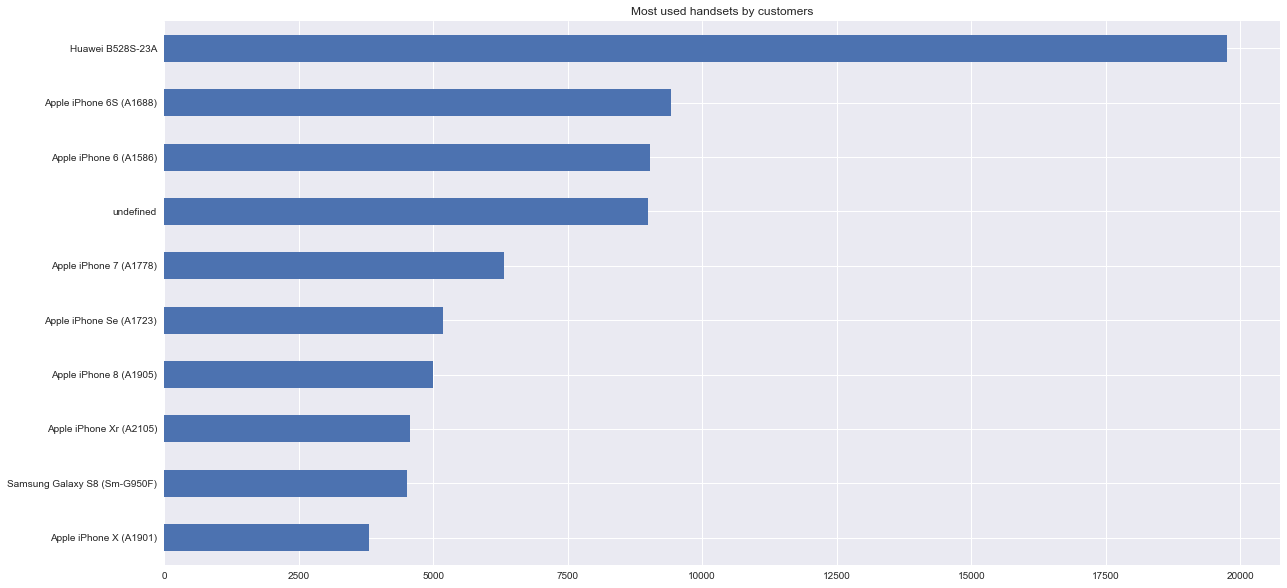

In [121]:
top_10_handsets.plot(kind="barh", figsize=(20, 10), title="Most used handsets by customers").invert_yaxis()

### Top 3 handset manufacturers

In [122]:
top_3_handset_manufacturers = data_modified["Handset Manufacturer"].value_counts().nlargest(3)

In [123]:
top_3_handset_manufacturers

Apple      59565
Samsung    40839
Huawei     34423
Name: Handset Manufacturer, dtype: int64

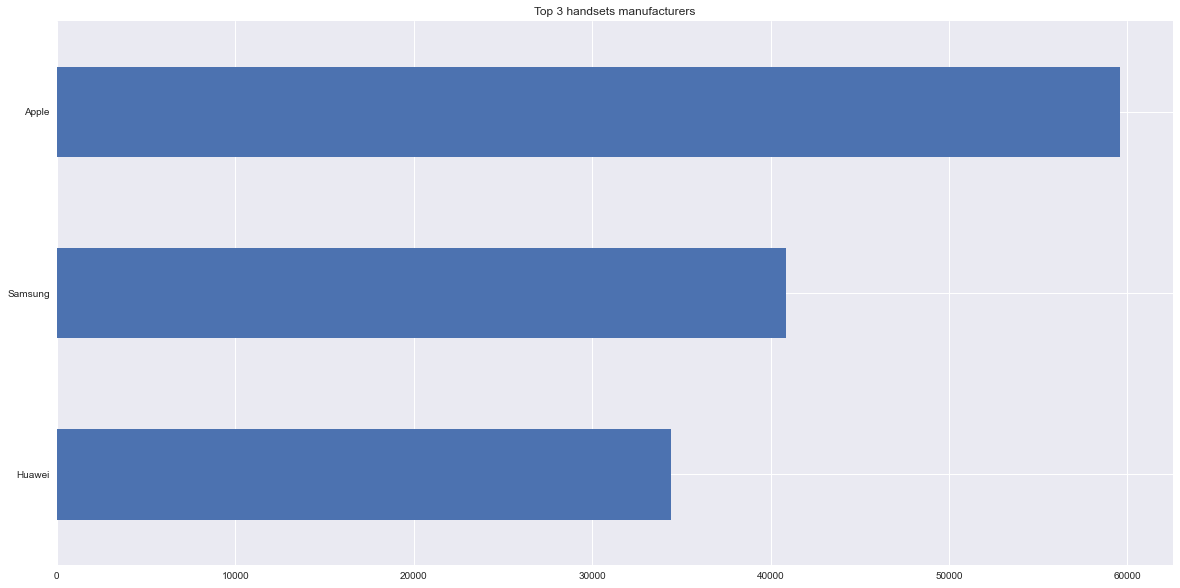

In [124]:
top_3_handset_manufacturers.plot(kind="barh", figsize=(20, 10), title="Top 3 handsets manufacturers").invert_yaxis()

### Top 5 Handsets Manufactured by Apple

In [125]:
top_5_apple_handsets = data_modified[data_modified["Handset Manufacturer"] == "Apple"][["Handset Manufacturer", "Handset Type"]].groupby("Handset Type").count().nlargest(n=5, columns="Handset Manufacturer")

In [126]:
top_5_apple_handsets

,Handset Manufacturer
Handset Type,
Apple iPhone 6S (A1688),9419
Apple iPhone 6 (A1586),9023
Apple iPhone 7 (A1778),6326
Apple iPhone Se (A1723),5187
Apple iPhone 8 (A1905),4993


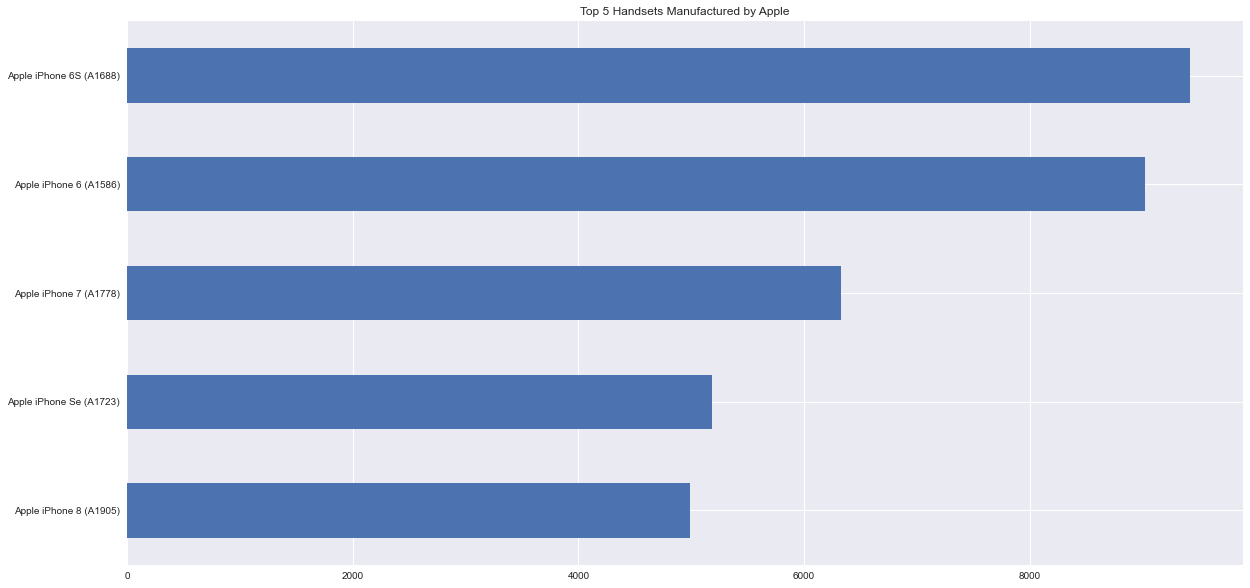

In [127]:
top_5_apple_handsets.plot(kind="barh", figsize=(20, 10), title="Top 5 Handsets Manufactured by Apple", legend=False, xlabel="").invert_yaxis()

### Top 5 Handsets Manufactured by Samsung

In [128]:
top_5_samsung_handsets = data_modified[data_modified["Handset Manufacturer"] == "Samsung"][["Handset Manufacturer", "Handset Type"]].groupby("Handset Type").count().nlargest(n=5, columns="Handset Manufacturer")

In [129]:
top_5_samsung_handsets

,Handset Manufacturer
Handset Type,
Samsung Galaxy S8 (Sm-G950F),4520
Samsung Galaxy A5 Sm-A520F,3724
Samsung Galaxy J5 (Sm-J530),3696
Samsung Galaxy J3 (Sm-J330),3484
Samsung Galaxy S7 (Sm-G930X),3199


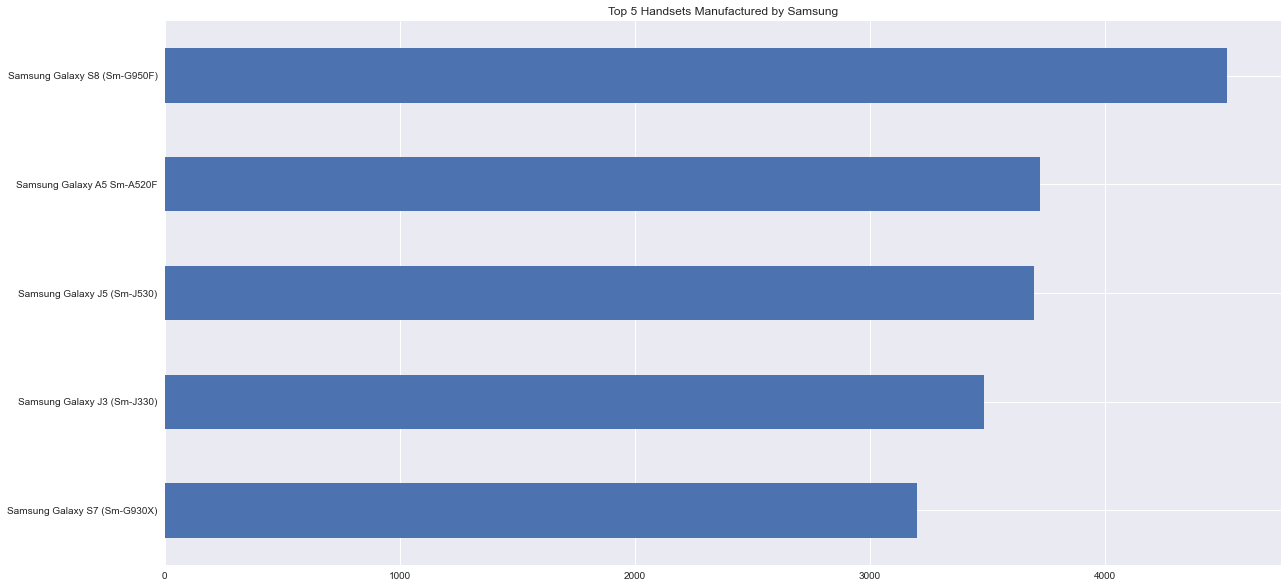

In [130]:
top_5_samsung_handsets.plot(kind="barh", figsize=(20, 10), title="Top 5 Handsets Manufactured by Samsung", legend=False, xlabel="").invert_yaxis()

### Top 5 Handsets Manufactured by Huawei

In [131]:
top_5_huawei_handsets = data_modified[data_modified["Handset Manufacturer"] == "Huawei"][["Handset Manufacturer", "Handset Type"]].groupby("Handset Type").count().nlargest(n=5, columns="Handset Manufacturer")

In [132]:
top_5_huawei_handsets

,Handset Manufacturer
Handset Type,
Huawei B528S-23A,19752
Huawei E5180,2079
Huawei P20 Lite Huawei Nova 3E,2021
Huawei P20,1480
Huawei Y6 2018,997


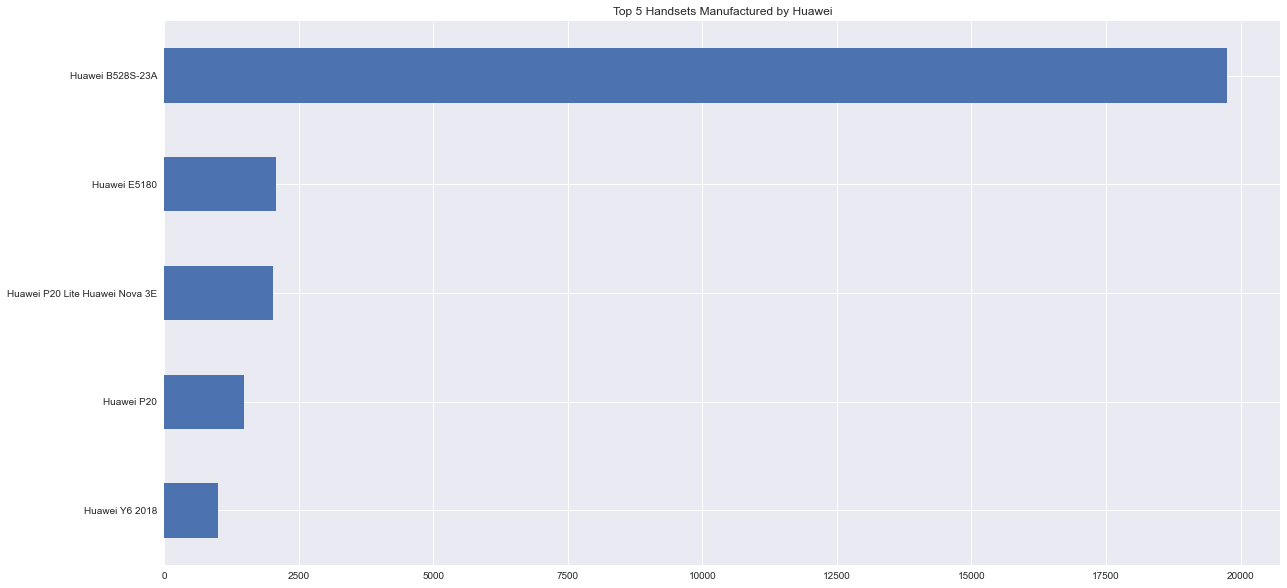

In [133]:
top_5_huawei_handsets.plot(kind="barh", figsize=(20, 10), title="Top 5 Handsets Manufactured by Huawei", legend=False, xlabel="").invert_yaxis()

Looking at the insights, TellCo should start selling Apple, Samsung and Huawei manufactured handsets by partnering with them. The marketing team can then let customers know that they're selling these handsets in order to generate more revenue. 

### Grouping values to look into sessions per user
---

In [134]:
data_modified.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (s),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms),Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352.00,2019-04-04 12:01:00,770.00,2019-04-25 14:35:00,662.00,1823652.00,208201448079117.00,33664962239.00,35521209507511.00,9.16456699548519E+015,42.00,5.00,23.00,44.00,NaN,NaN,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,NaN,NaN,37624.00,38787.00,1823652892.00,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.00,214.00,1545765.00,24420.00,1634479.00,1271433.00,3563542.00,137762.00,15854611.00,2501332.00,8198936.00,9656251.00,278082303.00,14344150.00,171744450.00,8814393.00,36749741.00,308879636.00
1,13114483482878900224.00,2019-04-09 13:04:00,235.00,2019-04-25 08:15:00,606.00,1365104.00,208201909211140.00,33681854413.00,35794009006359.00,L77566A,65.00,5.00,16.00,26.00,NaN,NaN,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,NaN,NaN,168.00,3560.00,1365104371.00,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.00,1022.00,1926113.00,7165.00,3493924.00,920172.00,629046.00,308339.00,20247395.00,19111729.00,18338413.00,17227132.00,608750074.00,1170709.00,526904238.00,15055145.00,53800391.00,653384965.00
2,13114483484080500736.00,2019-04-09 17:42:00,1.00,2019-04-25 11:58:00,652.00,1361762.00,208200314458056.00,33760627129.00,35281510359387.00,D42335A,NaN,NaN,6.00,9.00,NaN,NaN,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,NaN,NaN,0.00,0.00,1361762651.00,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.00,695.00,1684053.00,42224.00,8535055.00,1694064.00,2690151.00,672973.00,19725661.00,14699576.00,17587794.00,6163408.00,229584621.00,395630.00,410692588.00,4215763.00,27883638.00,279807335.00
3,13114483485442799616.00,2019-04-10 00:31:00,486.00,2019-04-25 07:36:00,171.00,1321509.00,208201402342131.00,33750343200.00,35356610164913.00,T21824A,NaN,NaN,44.00,44.00,NaN,NaN,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,NaN,NaN,3330.00,37882.00,1321509685.00,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.00,207.00,644121.00,13372.00,9023734.00,2788027.00,1439754.00,631229.00,21388122.00,15146643.00,13994646.00,1097942.00,799538153.00,10849722.00,749039933.00,12797283.00,43324218.00,846028530.00
4,13114483499480700928.00,2019-04-12 20:10:00,565.00,2019-04-25 10:40:00,954.00,1089009.00,208201401415120.00,33699795932.00,35407009745539.00,D88865A,NaN,NaN,6.00,9.00,NaN,NaN,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,NaN,NaN,0.00,0.00,1089009389.00,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.00,604.00,862600.00,50188.00,6248284.00,1500559.00,1936496.00,173853.00,15259380.00,18962873.00,17124581.00,415218.00,527707248.00,3529801.00,550709500.00,13910322.00,38542814.00,569138589.00


In [135]:
user_agg = data_modified.groupby(["MSISDN/Number"], as_index=False).agg({'Bearer Id':'count', "Dur. (s)": "sum", "Total UL (Bytes)": "sum", "Total DL (Bytes)": "sum",  "Social Media UL (Bytes)": "sum", "Social Media DL (Bytes)": "sum", "Google UL (Bytes)": "sum", "Google DL (Bytes)": "sum", "Email UL (Bytes)": "sum", "Email DL (Bytes)": "sum", "Youtube UL (Bytes)": "sum", "Youtube DL (Bytes)": "sum", "Netflix UL (Bytes)": "sum", "Netflix DL (Bytes)": "sum", "Gaming UL (Bytes)": "sum", "Gaming DL (Bytes)": "sum", "Other UL (Bytes)": "sum", "Other DL (Bytes)": "sum"})
user_agg.reset_index(drop=True, inplace=True)

In [136]:
# change column to string to avoid numerical calculations
user_agg["MSISDN/Number"] = user_agg["MSISDN/Number"].astype(str)

In [137]:
user_agg.shape

(106856, 19)

In [138]:
user_agg.rename(columns={"Bearer Id": "Session Count"}, inplace=True)

In [139]:
user_agg["Total Data Transferred"] = user_agg["Total UL (Bytes)"] + user_agg["Total DL (Bytes)"]

In [140]:
user_agg["Google Volume (Bytes)"] = user_agg["Google UL (Bytes)"] + user_agg["Google DL (Bytes)"]
user_agg["Netflix Volume (Bytes)"] = user_agg["Netflix UL (Bytes)"] + user_agg["Netflix DL (Bytes)"]
user_agg["Youtube Volume (Bytes)"] = user_agg["Youtube UL (Bytes)"] + user_agg["Youtube DL (Bytes)"]
user_agg["Gaming Volume (Bytes)"] = user_agg["Gaming UL (Bytes)"] + user_agg["Gaming DL (Bytes)"]
user_agg["Email Volume (Bytes)"] = user_agg["Email UL (Bytes)"] + user_agg["Email DL (Bytes)"]
user_agg["Social Media Volume (Bytes)"] = user_agg["Social Media UL (Bytes)"] + user_agg["Social Media DL (Bytes)"]
user_agg["Other Volume (Bytes)"] = user_agg["Other UL (Bytes)"] + user_agg["Other DL (Bytes)"]

In [141]:
# user_agg["Total Volume (Bytes)"] = user_agg["Google Volume (Bytes)"] + user_agg["Netflix Volume (Bytes)"] + user_agg["Youtube Volume (Bytes)"] + user_agg["Gaming Volume (Bytes)"] + user_agg["Other Volume (Bytes)"] + user_agg["Social Media Volume (Bytes)"] + user_agg["Email Volume (Bytes)"]

In [142]:
user_agg.shape

(106856, 27)

In [143]:
user_agg.head()

,MSISDN/Number,Session Count,Dur. (s),Total UL (Bytes),Total DL (Bytes),Social Media UL (Bytes),Social Media DL (Bytes),Google UL (Bytes),Google DL (Bytes),Email UL (Bytes),Email DL (Bytes),Youtube UL (Bytes),Youtube DL (Bytes),Netflix UL (Bytes),Netflix DL (Bytes),Gaming UL (Bytes),Gaming DL (Bytes),Other UL (Bytes),Other DL (Bytes),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes)
0,33601001722.0,1,116720.00,36053108.00,842637466.00,25631.00,2206504.00,1051882.00,3337123.00,493962.00,837400.00,6724347.00,14900201.00,16915876.00,10265105.00,1367528.00,811091133.00,9473882.00,377096990.00,878690574.00,4389005.00,27180981.00,21624548.00,812458661.00,1331362.00,2232135.00,386570872.00
1,33601001754.0,1,181230.00,36104459.00,120755184.00,62017.00,2598548.00,1137166.00,4197697.00,478960.00,2828821.00,7107972.00,5324251.00,10451194.00,770569.00,14714780.00,105035298.00,2152370.00,279557701.00,156859643.00,5334863.00,11221763.00,12432223.00,119750078.00,3307781.00,2660565.00,281710071.00
2,33601002511.0,1,134969.00,39306820.00,556659663.00,47619.00,3148004.00,99643.00,3343483.00,768880.00,2436500.00,19196298.00,2137272.00,2827981.00,16525919.00,9759228.00,529068485.00,6607171.00,495086501.00,595966483.00,3443126.00,19353900.00,21333570.00,538827713.00,3205380.00,3195623.00,501693672.00
3,33601007832.0,1,49878.00,20327526.00,401993172.00,28825.00,251469.00,3740728.00,5937765.00,106052.00,2178618.00,2584198.00,4393123.00,784730.00,1157362.00,3051292.00,388074835.00,10031701.00,25248001.00,422320698.00,9678493.00,1942092.00,6977321.00,391126127.00,2284670.00,280294.00,35279702.00
4,33601008617.0,2,37104.00,94280527.00,1363130417.00,51312.00,2861230.00,4770948.00,13728668.00,1057661.00,2247808.00,31193031.00,10339971.00,24230077.00,24971647.00,5816727.00,1308981093.00,27160771.00,777643713.00,1457410944.00,18499616.00,49201724.00,41533002.00,1314797820.00,3305469.00,2912542.00,804804484.00


In [144]:
volume_per_user = user_agg.drop(columns=[
    "Total UL (Bytes)",
    "Total DL (Bytes)",
    "Social Media UL (Bytes)",
    "Social Media DL (Bytes)",
    "Google UL (Bytes)",
    "Google DL (Bytes)",
    "Email UL (Bytes)",
    "Email DL (Bytes)",
    "Youtube UL (Bytes)",
    "Youtube DL (Bytes)",
    "Netflix UL (Bytes)",
    "Netflix DL (Bytes)",
    "Gaming UL (Bytes)",
    "Gaming DL (Bytes)",
    "Other UL (Bytes)",
    "Other DL (Bytes)"
])

In [146]:
volume_per_user

,MSISDN/Number,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes)
0,33601001722.0,1,116720.00,878690574.00,4389005.00,27180981.00,21624548.00,812458661.00,1331362.00,2232135.00,386570872.00
1,33601001754.0,1,181230.00,156859643.00,5334863.00,11221763.00,12432223.00,119750078.00,3307781.00,2660565.00,281710071.00
2,33601002511.0,1,134969.00,595966483.00,3443126.00,19353900.00,21333570.00,538827713.00,3205380.00,3195623.00,501693672.00
3,33601007832.0,1,49878.00,422320698.00,9678493.00,1942092.00,6977321.00,391126127.00,2284670.00,280294.00,35279702.00
4,33601008617.0,2,37104.00,1457410944.00,18499616.00,49201724.00,41533002.00,1314797820.00,3305469.00,2912542.00,804804484.00
...,...,...,...,...,...,...,...,...,...,...,...
106851,33789996170.0,1,8810.00,714641641.00,7531269.00,14902538.00,26647843.00,660361359.00,1006915.00,300183.00,295282817.00
106852,33789997247.0,1,140988.00,480307335.00,5429705.00,8531060.00,19851572.00,437003292.00,2514097.00,498569.00,211115113.00
106853,3197020876596.0,1,877385.00,232123971.00,10438660.00,26592300.00,11959905.00,178048738.00,1520771.00,715224.00,470526473.00
106854,337000037000919.0,1,253030.00,596287824.00,9830617.00,30905042.00,36734940.00,510142695.00,3318582.00,521566.00,149188439.00


In [149]:
#volume_per_user.to_csv(data_dir / "aggregated_data.csv", index=False)

In [60]:
volume_per_user.shape

(106856, 11)

In [61]:
volume_per_user.head()

,MSISDN/Number,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes)
0,33601001722.0,1,116720.0,8.786906e+08,4389005.0,27180981.0,21624548.0,8.124587e+08,1331362.0,2232135.0,386570872.0
1,33601001754.0,1,181230.0,1.568596e+08,5334863.0,11221763.0,12432223.0,1.197501e+08,3307781.0,2660565.0,281710071.0
2,33601002511.0,1,134969.0,5.959665e+08,3443126.0,19353900.0,21333570.0,5.388277e+08,3205380.0,3195623.0,501693672.0
3,33601007832.0,1,49878.0,4.223207e+08,9678493.0,1942092.0,6977321.0,3.911261e+08,2284670.0,280294.0,35279702.0
4,33601008617.0,2,37104.0,1.457411e+09,18499616.0,49201724.0,41533002.0,1.314798e+09,3305469.0,2912542.0,804804484.0


In [62]:
volume_per_user.describe()

,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes)
count,106856.000000,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05
mean,1.389777,1.461672e+05,6.909621e+08,1.088243e+07,3.153833e+07,3.155840e+07,5.997690e+08,3.148796e+06,2.547967e+06,5.985088e+08
std,0.809863,1.863587e+05,4.910559e+08,7.544861e+06,2.128956e+07,2.129492e+07,4.491505e+08,2.222400e+06,1.908038e+06,4.489221e+08
min,0.000000,7.142000e+03,3.324901e+07,4.033000e+04,1.845690e+05,7.890300e+04,3.063580e+05,1.817600e+04,1.563000e+03,1.490450e+05
25%,1.000000,7.130800e+04,3.585499e+08,5.942636e+06,1.855597e+07,1.863109e+07,2.880631e+08,1.674481e+06,1.211282e+06,2.855599e+08
50%,1.000000,1.027400e+05,6.179231e+08,9.586153e+06,2.671889e+07,2.680038e+07,5.423492e+08,2.799824e+06,2.303756e+06,5.398323e+08
75%,2.000000,1.727990e+05,8.574351e+08,1.321474e+07,3.797696e+07,3.792798e+07,7.773041e+08,3.847198e+06,3.307509e+06,7.753975e+08
max,18.000000,1.855375e+07,8.846226e+09,1.521919e+08,3.995191e+08,4.529588e+08,7.749432e+09,4.241878e+07,4.337478e+07,8.167878e+09


### Non graphical Univariate analysis
---

In [63]:
volume_per_user.columns.tolist()

['MSISDN/Number',
 'Session Count',
 'Dur. (s)',
 'Total Data Transferred',
 'Google Volume (Bytes)',
 'Netflix Volume (Bytes)',
 'Youtube Volume (Bytes)',
 'Gaming Volume (Bytes)',
 'Email Volume (Bytes)',
 'Social Media Volume (Bytes)',
 'Other Volume (Bytes)']

In [64]:
volume_per_user["Session Count"].describe()

count    106856.000000
mean          1.389777
std           0.809863
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          18.000000
Name: Session Count, dtype: float64

In [65]:
volume_per_user["Dur. (s)"].describe()

count    1.068560e+05
mean     1.461672e+05
std      1.863587e+05
min      7.142000e+03
25%      7.130800e+04
50%      1.027400e+05
75%      1.727990e+05
max      1.855375e+07
Name: Dur. (s), dtype: float64

In [66]:
volume_per_user["Total Data Transferred"].describe()

count    1.068560e+05
mean     6.909621e+08
std      4.910559e+08
min      3.324901e+07
25%      3.585499e+08
50%      6.179231e+08
75%      8.574351e+08
max      8.846226e+09
Name: Total Data Transferred, dtype: float64

In [67]:
volume_per_user["Google Volume (Bytes)"].describe()

count    1.068560e+05
mean     1.088243e+07
std      7.544861e+06
min      4.033000e+04
25%      5.942636e+06
50%      9.586153e+06
75%      1.321474e+07
max      1.521919e+08
Name: Google Volume (Bytes), dtype: float64

In [68]:
volume_per_user["Netflix Volume (Bytes)"].describe()

count    1.068560e+05
mean     3.153833e+07
std      2.128956e+07
min      1.845690e+05
25%      1.855597e+07
50%      2.671889e+07
75%      3.797696e+07
max      3.995191e+08
Name: Netflix Volume (Bytes), dtype: float64

In [69]:
volume_per_user["Youtube Volume (Bytes)"].describe()

count    1.068560e+05
mean     3.155840e+07
std      2.129492e+07
min      7.890300e+04
25%      1.863109e+07
50%      2.680038e+07
75%      3.792798e+07
max      4.529588e+08
Name: Youtube Volume (Bytes), dtype: float64

In [70]:
volume_per_user["Email Volume (Bytes)"].describe()

count    1.068560e+05
mean     3.148796e+06
std      2.222400e+06
min      1.817600e+04
25%      1.674481e+06
50%      2.799824e+06
75%      3.847198e+06
max      4.241878e+07
Name: Email Volume (Bytes), dtype: float64

In [71]:
volume_per_user["Gaming Volume (Bytes)"].describe()

count    1.068560e+05
mean     5.997690e+08
std      4.491505e+08
min      3.063580e+05
25%      2.880631e+08
50%      5.423492e+08
75%      7.773041e+08
max      7.749432e+09
Name: Gaming Volume (Bytes), dtype: float64

In [72]:
volume_per_user["Social Media Volume (Bytes)"].describe()

count    1.068560e+05
mean     2.547967e+06
std      1.908038e+06
min      1.563000e+03
25%      1.211282e+06
50%      2.303756e+06
75%      3.307509e+06
max      4.337478e+07
Name: Social Media Volume (Bytes), dtype: float64

In [73]:
volume_per_user["Other Volume (Bytes)"].describe()

count    1.068560e+05
mean     5.985088e+08
std      4.489221e+08
min      1.490450e+05
25%      2.855599e+08
50%      5.398323e+08
75%      7.753975e+08
max      8.167878e+09
Name: Other Volume (Bytes), dtype: float64

In [74]:
# volume_per_user["Total Volume (Bytes)"].describe()

In [75]:
volume_per_user.describe()

,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes)
count,106856.000000,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05
mean,1.389777,1.461672e+05,6.909621e+08,1.088243e+07,3.153833e+07,3.155840e+07,5.997690e+08,3.148796e+06,2.547967e+06,5.985088e+08
std,0.809863,1.863587e+05,4.910559e+08,7.544861e+06,2.128956e+07,2.129492e+07,4.491505e+08,2.222400e+06,1.908038e+06,4.489221e+08
min,0.000000,7.142000e+03,3.324901e+07,4.033000e+04,1.845690e+05,7.890300e+04,3.063580e+05,1.817600e+04,1.563000e+03,1.490450e+05
25%,1.000000,7.130800e+04,3.585499e+08,5.942636e+06,1.855597e+07,1.863109e+07,2.880631e+08,1.674481e+06,1.211282e+06,2.855599e+08
50%,1.000000,1.027400e+05,6.179231e+08,9.586153e+06,2.671889e+07,2.680038e+07,5.423492e+08,2.799824e+06,2.303756e+06,5.398323e+08
75%,2.000000,1.727990e+05,8.574351e+08,1.321474e+07,3.797696e+07,3.792798e+07,7.773041e+08,3.847198e+06,3.307509e+06,7.753975e+08
max,18.000000,1.855375e+07,8.846226e+09,1.521919e+08,3.995191e+08,4.529588e+08,7.749432e+09,4.241878e+07,4.337478e+07,8.167878e+09


### Graphical Univariate analysis
---

<AxesSubplot:>

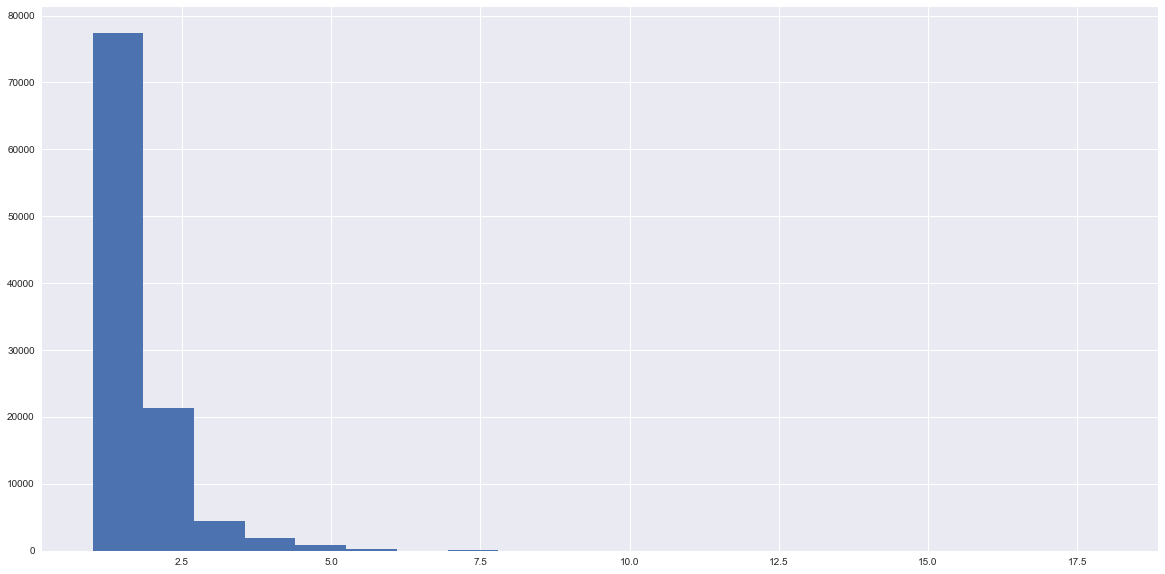

In [100]:
volume_per_user["Session Count"].hist(bins=20, figsize=(20, 10))

<AxesSubplot:>

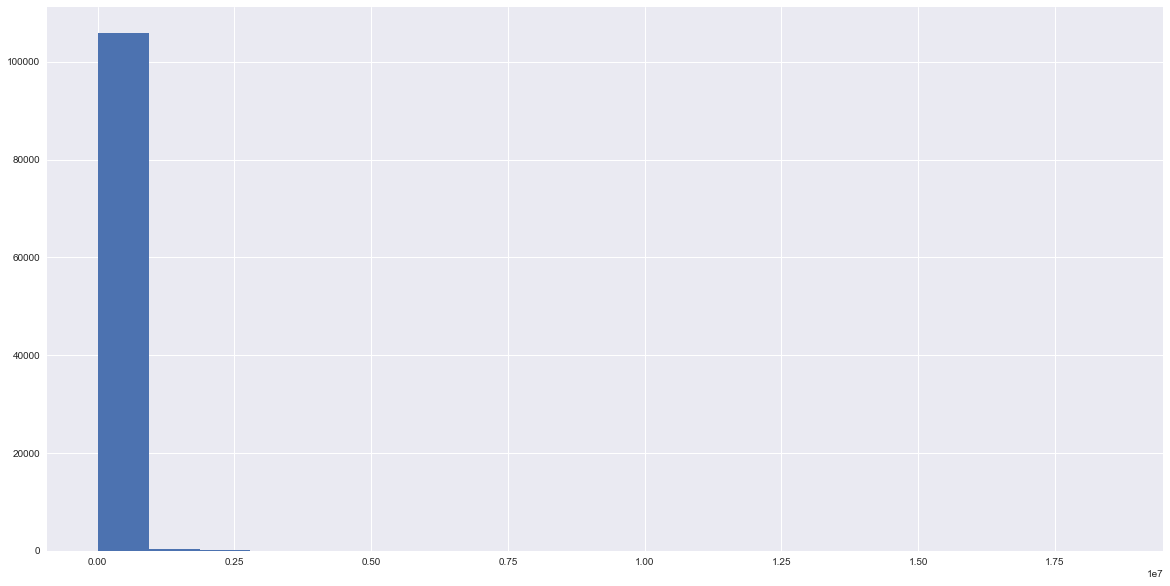

In [101]:
volume_per_user["Dur. (s)"].hist(bins=20, figsize=(20, 10))

<AxesSubplot:>

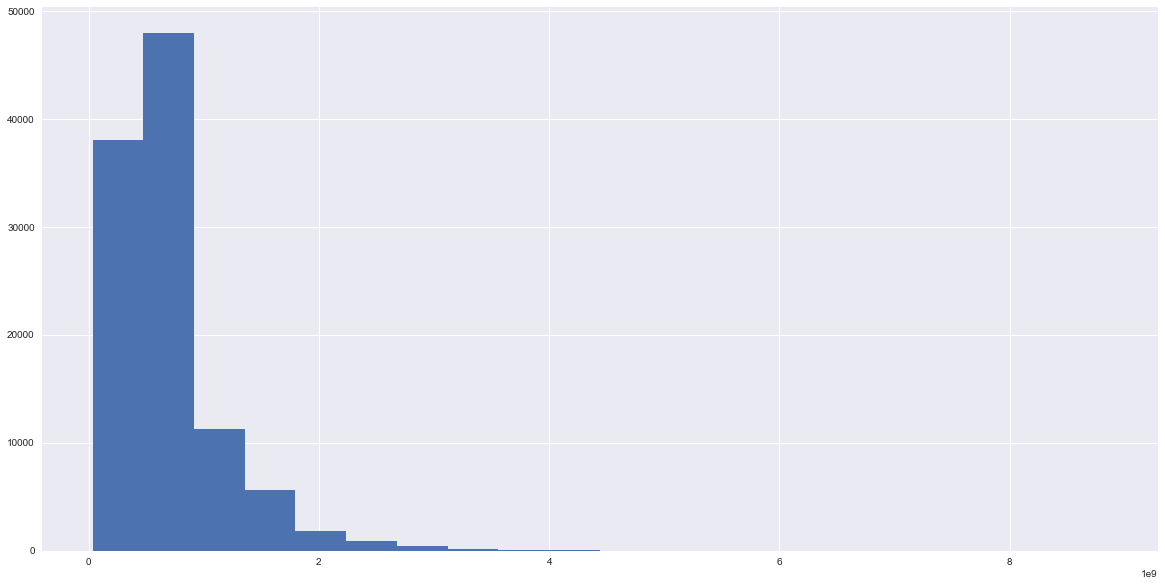

In [102]:
volume_per_user["Total Data Transferred"].hist(bins=20, figsize=(20, 10))

<AxesSubplot:>

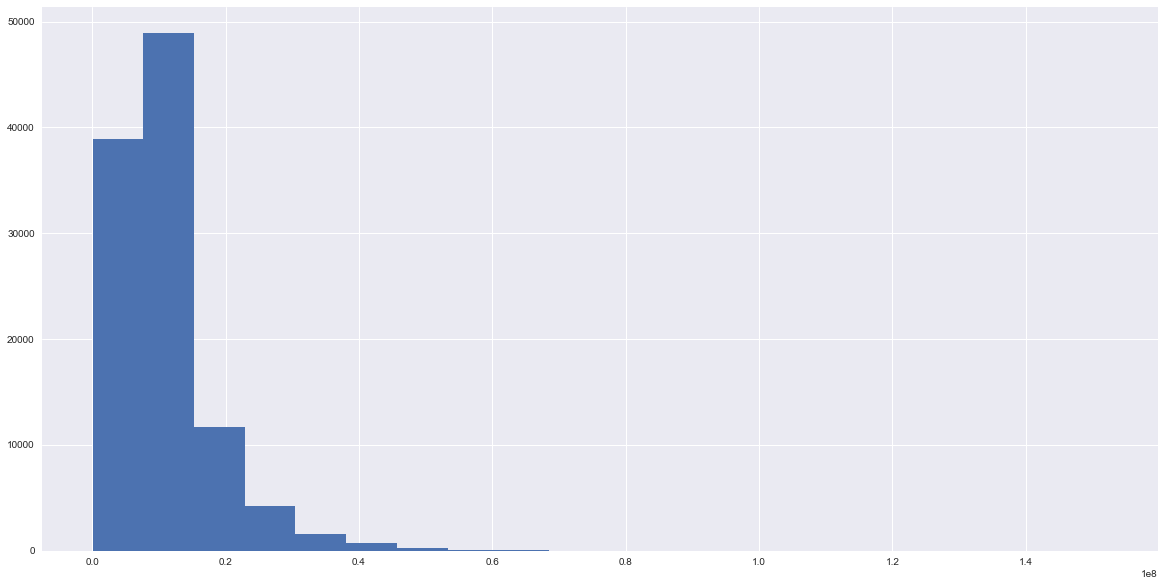

In [103]:
volume_per_user["Google Volume (Bytes)"].hist(bins=20, figsize=(20, 10))

<AxesSubplot:>

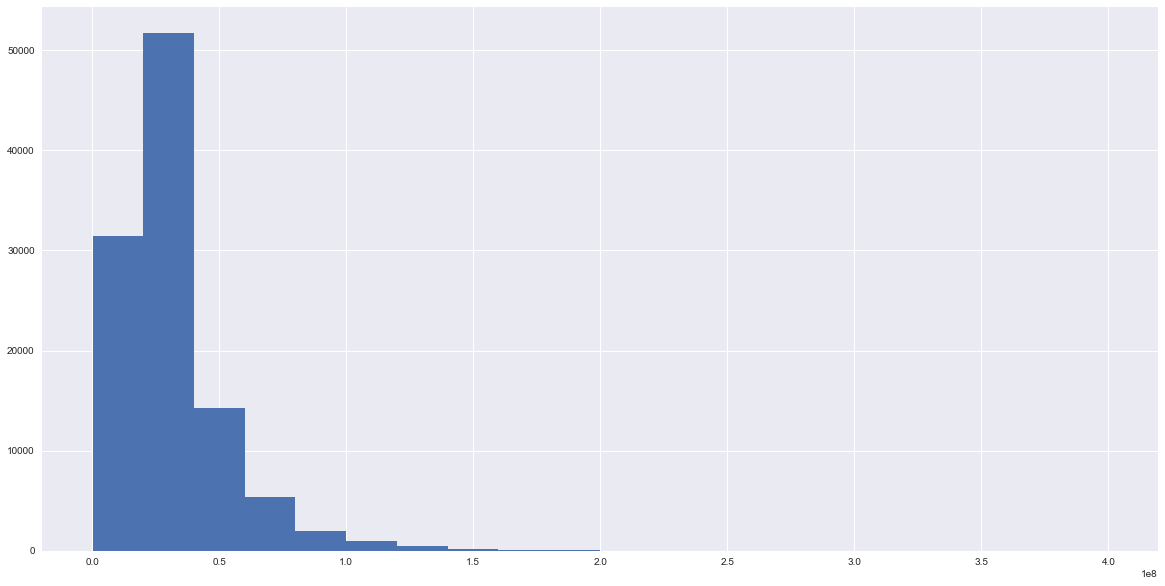

In [104]:
volume_per_user["Netflix Volume (Bytes)"].hist(bins=20, figsize=(20, 10))

<AxesSubplot:>

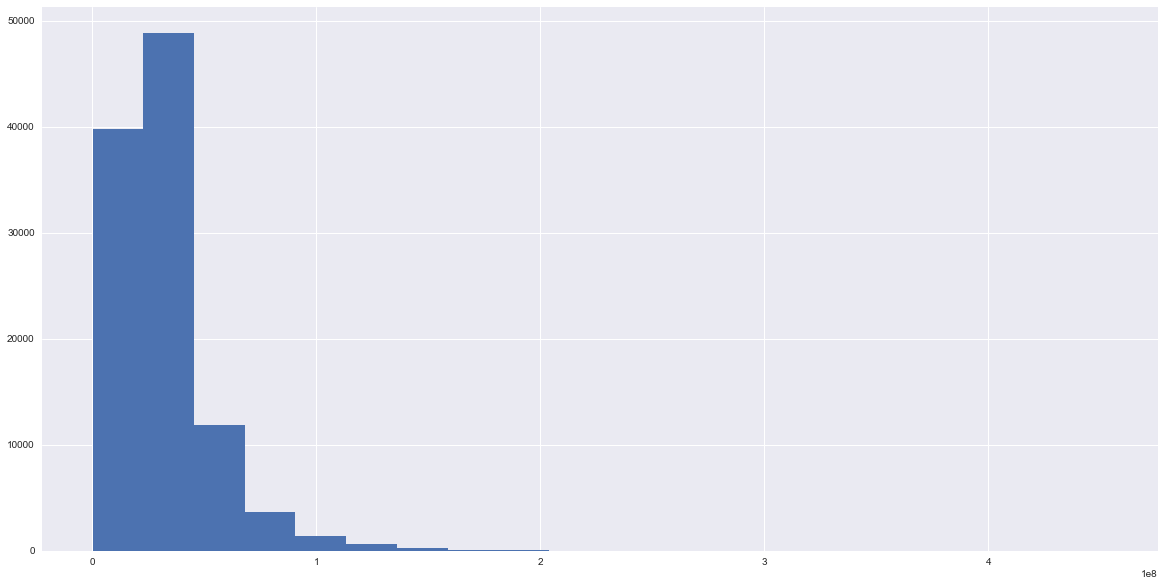

In [105]:
volume_per_user["Youtube Volume (Bytes)"].hist(bins=20, figsize=(20, 10))

<AxesSubplot:>

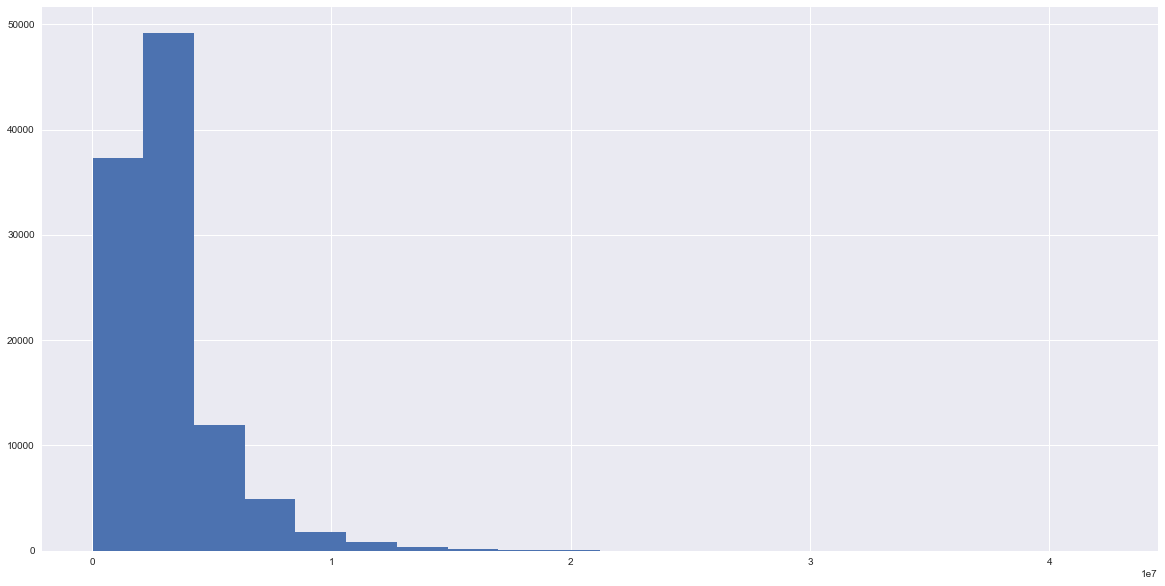

In [106]:
volume_per_user["Email Volume (Bytes)"].hist(bins=20, figsize=(20, 10))

<AxesSubplot:>

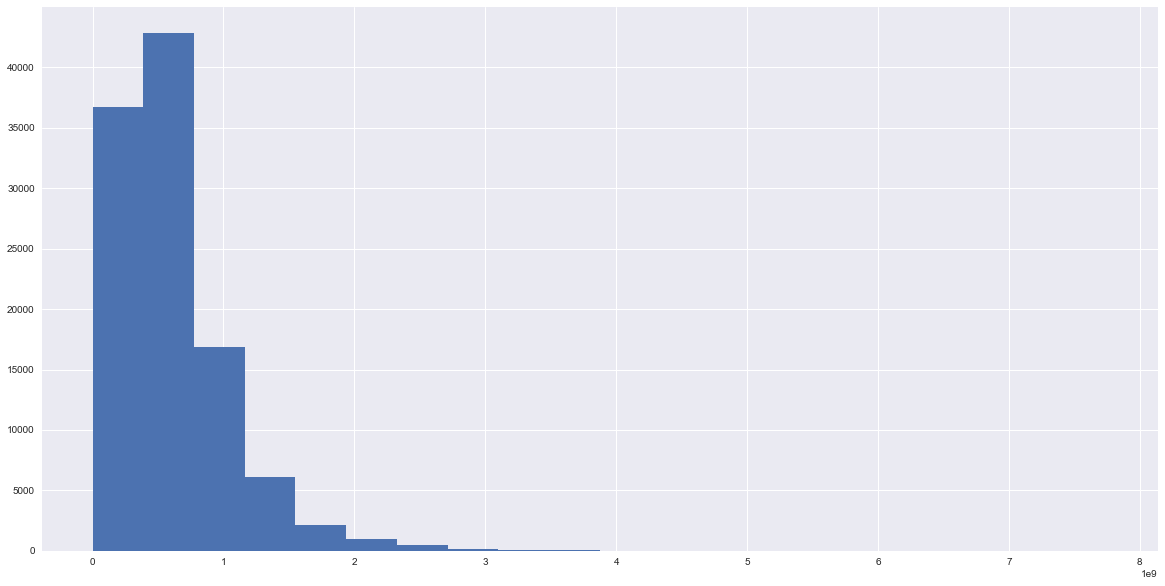

In [107]:
volume_per_user["Gaming Volume (Bytes)"].hist(bins=20, figsize=(20, 10))

<AxesSubplot:>

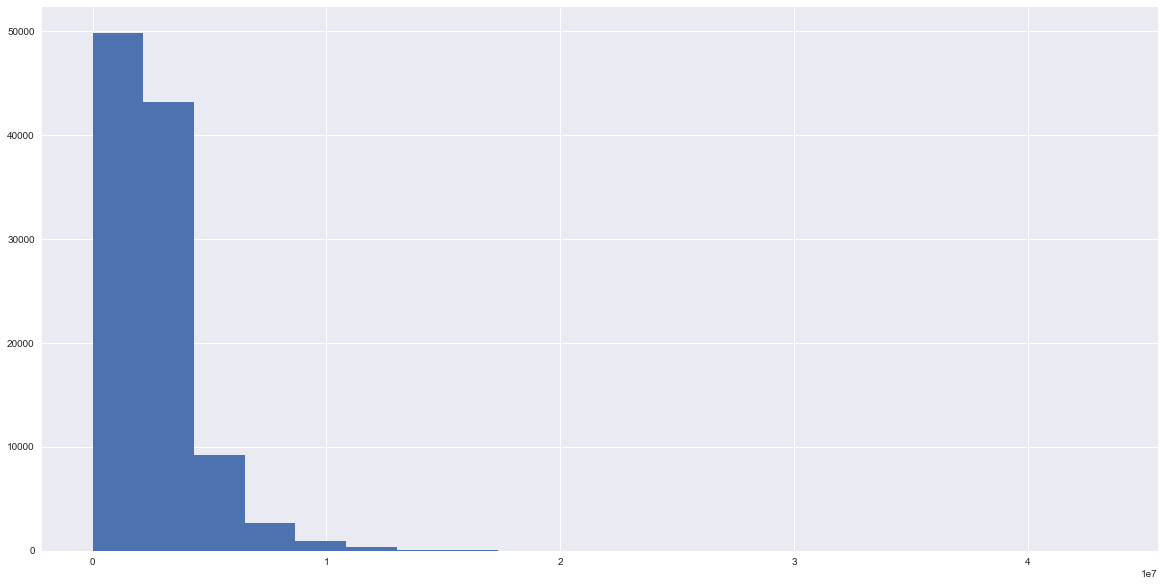

In [108]:
volume_per_user["Social Media Volume (Bytes)"].hist(bins=20, figsize=(20, 10))

<AxesSubplot:>

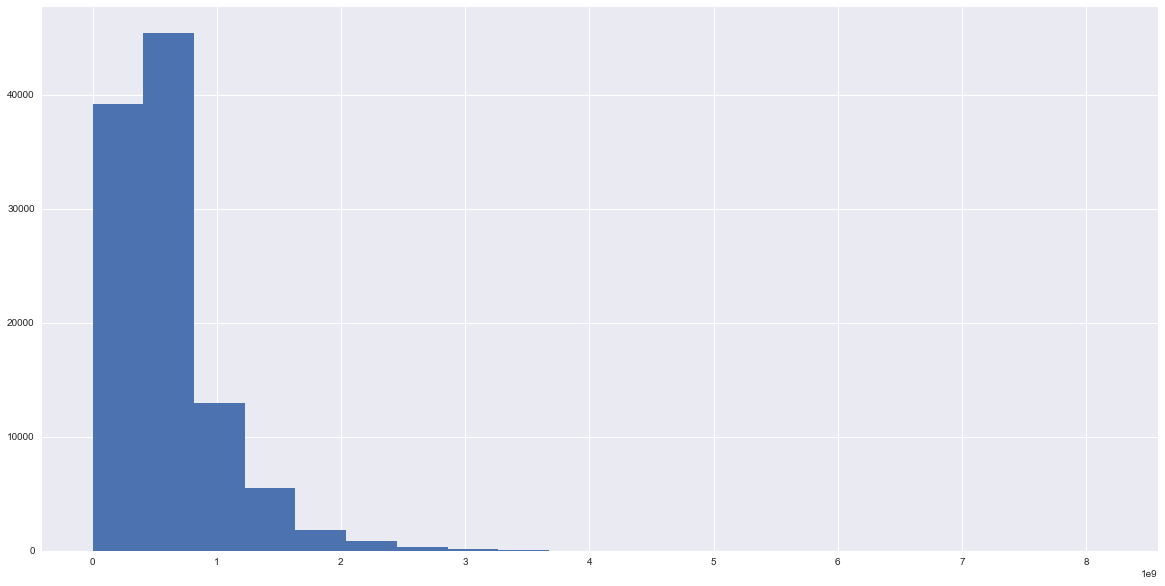

In [109]:
volume_per_user["Other Volume (Bytes)"].hist(bins=20, figsize=(20, 10))

array([[<AxesSubplot:title={'center':'Session Count'}>,
        <AxesSubplot:title={'center':'Dur. (s)'}>,
        <AxesSubplot:title={'center':'Total Data Transferred'}>],
       [<AxesSubplot:title={'center':'Google Volume (Bytes)'}>,
        <AxesSubplot:title={'center':'Netflix Volume (Bytes)'}>,
        <AxesSubplot:title={'center':'Youtube Volume (Bytes)'}>],
       [<AxesSubplot:title={'center':'Gaming Volume (Bytes)'}>,
        <AxesSubplot:title={'center':'Email Volume (Bytes)'}>,
        <AxesSubplot:title={'center':'Social Media Volume (Bytes)'}>],
       [<AxesSubplot:title={'center':'Other Volume (Bytes)'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

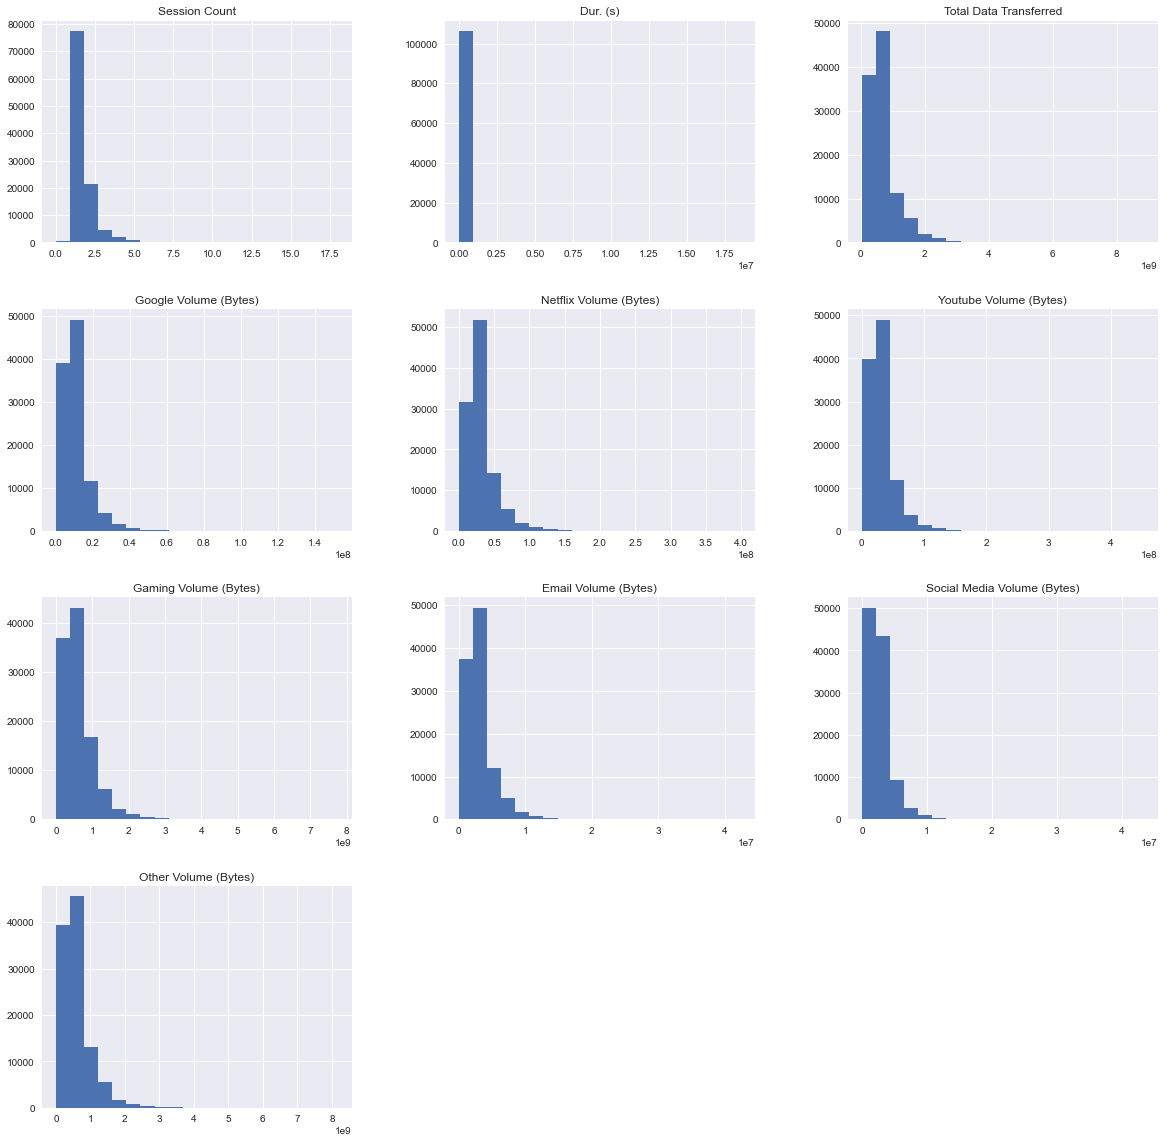

In [77]:
volume_per_user.hist(bins=20, figsize=(20, 20))

<AxesSubplot:>

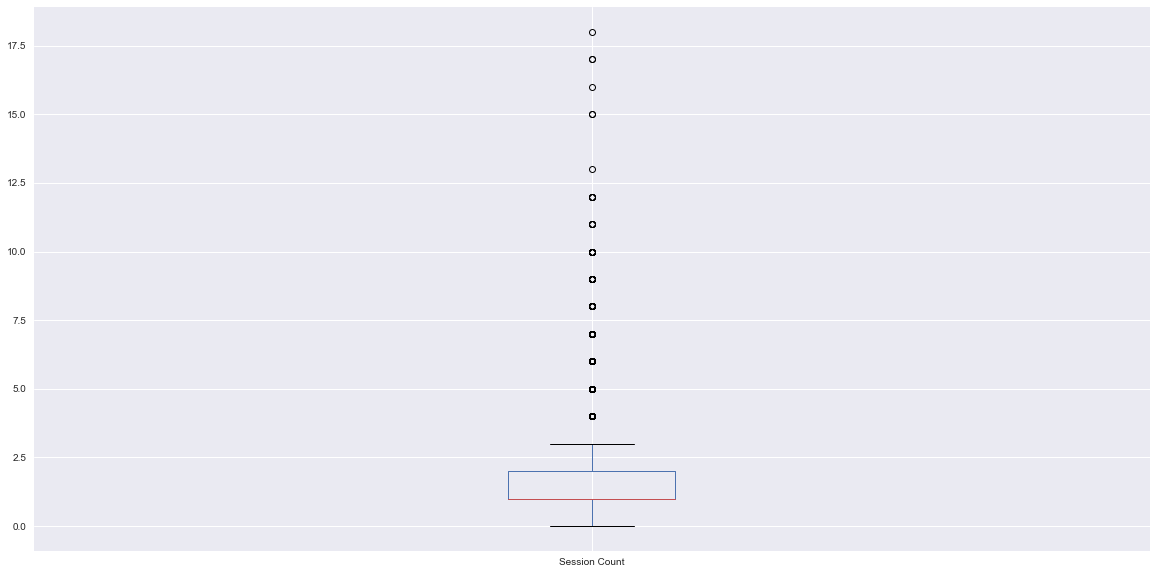

In [78]:
volume_per_user.boxplot(column=["Session Count"], figsize=(20, 10))

### Bivariate analysis
---

In [113]:
volume_per_user.corr()

,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes)
Session Count,1.00,0.64,0.81,0.84,0.86,0.86,0.77,0.82,0.77,0.77
Dur. (s),0.64,1.00,0.52,0.53,0.54,0.55,0.49,0.53,0.49,0.49
Total Data Transferred,0.81,0.52,1.00,0.68,0.71,0.71,1.00,0.66,0.62,0.62
Google Volume (Bytes),0.84,0.53,0.68,1.00,0.72,0.72,0.64,0.69,0.64,0.64
Netflix Volume (Bytes),0.86,0.54,0.71,0.72,1.00,0.74,0.66,0.71,0.66,0.66
Youtube Volume (Bytes),0.86,0.55,0.71,0.72,0.74,1.00,0.66,0.71,0.66,0.66
Gaming Volume (Bytes),0.77,0.49,1.00,0.64,0.66,0.66,1.00,0.63,0.59,0.59
Email Volume (Bytes),0.82,0.53,0.66,0.69,0.71,0.71,0.63,1.00,0.63,0.63
Social Media Volume (Bytes),0.77,0.49,0.62,0.64,0.66,0.66,0.59,0.63,1.00,0.59
Other Volume (Bytes),0.77,0.49,0.62,0.64,0.66,0.66,0.59,0.63,0.59,1.00


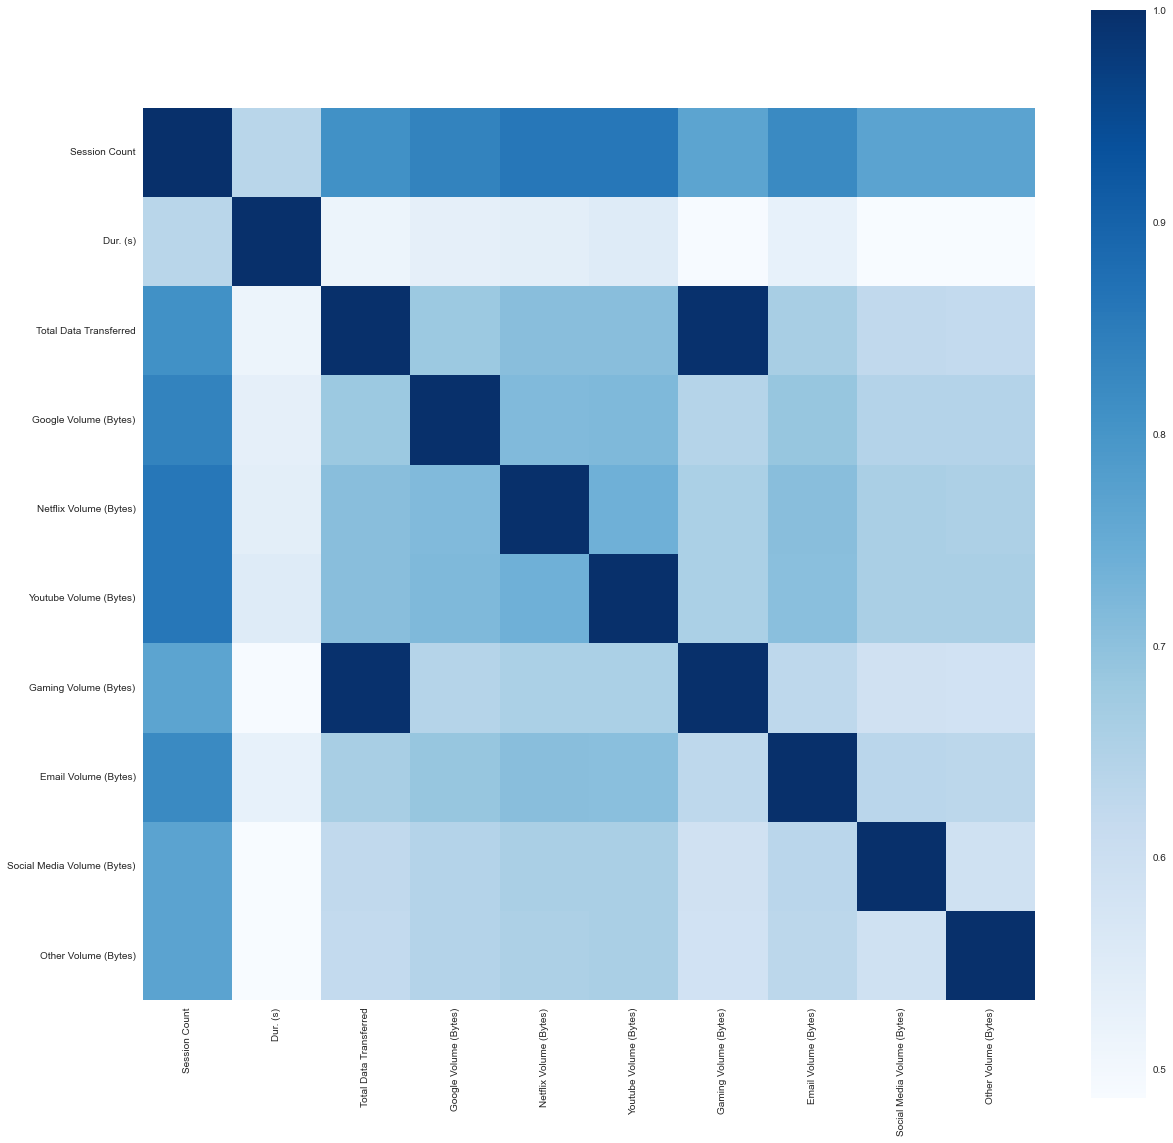

In [114]:
fig, ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(volume_per_user.corr(), cmap="Blues", square=True)

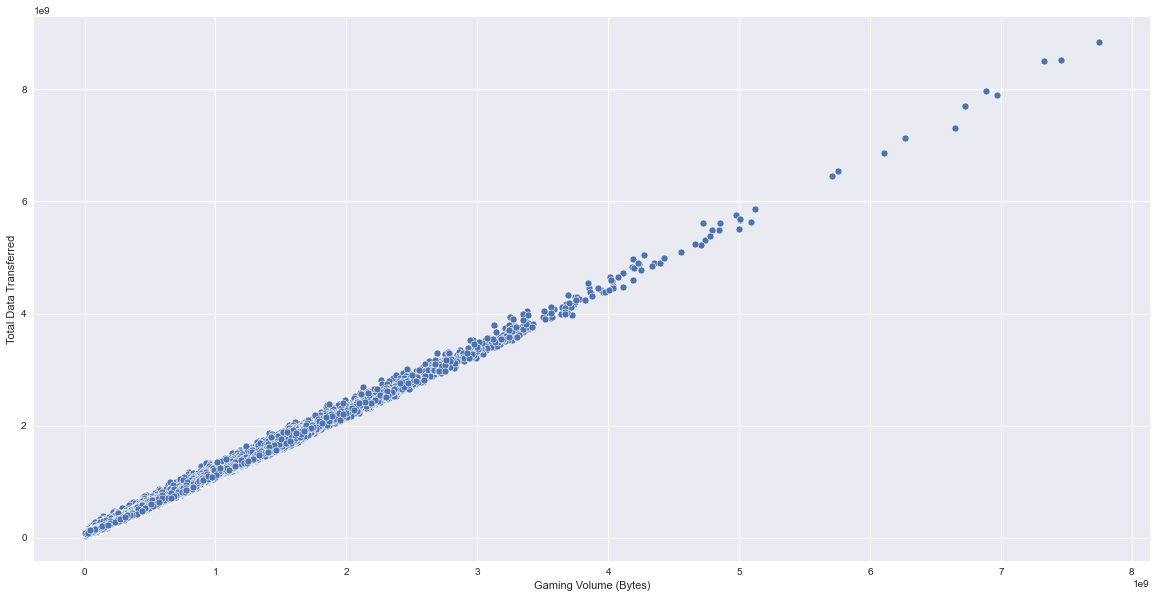

In [115]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.scatterplot(x= volume_per_user["Gaming Volume (Bytes)"], y= volume_per_user["Total Data Transferred"])

In [116]:
bivariate = volume_per_user.drop(columns=["MSISDN/Number", "Session Count", "Dur. (s)"])

In [117]:
bivariate.head()

,Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes)
0,878690574.00,4389005.00,27180981.00,21624548.00,812458661.00,1331362.00,2232135.00,386570872.00
1,156859643.00,5334863.00,11221763.00,12432223.00,119750078.00,3307781.00,2660565.00,281710071.00
2,595966483.00,3443126.00,19353900.00,21333570.00,538827713.00,3205380.00,3195623.00,501693672.00
3,422320698.00,9678493.00,1942092.00,6977321.00,391126127.00,2284670.00,280294.00,35279702.00
4,1457410944.00,18499616.00,49201724.00,41533002.00,1314797820.00,3305469.00,2912542.00,804804484.00


<AxesSubplot:xlabel='Netflix Volume (Bytes)', ylabel='Total Data Transferred'>

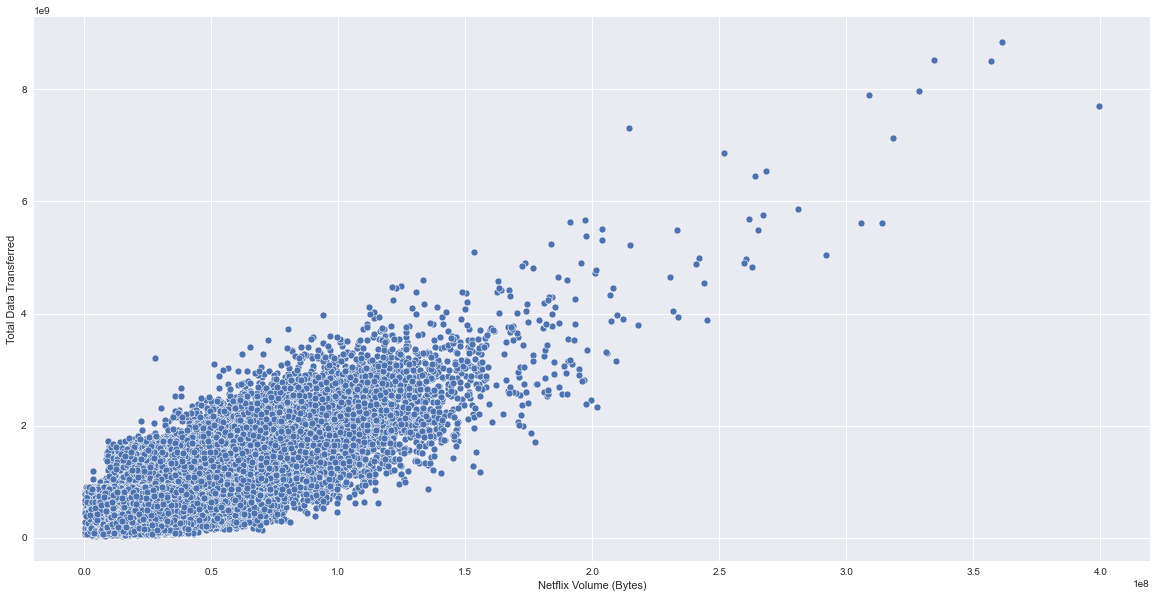

In [118]:
fig, ax = plt.subplots(figsize=(20, 10))

sns.scatterplot(x=bivariate["Netflix Volume (Bytes)"], y=bivariate["Total Data Transferred"], ax=ax)

### Decile Rank
---

In [79]:
volume_per_user["Decile Rank"] = pd.qcut(volume_per_user["Dur. (s)"], 10, labels=False)
volume_per_user.head()

,MSISDN/Number,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes),Decile Rank
0,33601001722.0,1,116720.0,8.786906e+08,4389005.0,27180981.0,21624548.0,8.124587e+08,1331362.0,2232135.0,386570872.0,5
1,33601001754.0,1,181230.0,1.568596e+08,5334863.0,11221763.0,12432223.0,1.197501e+08,3307781.0,2660565.0,281710071.0,7
2,33601002511.0,1,134969.0,5.959665e+08,3443126.0,19353900.0,21333570.0,5.388277e+08,3205380.0,3195623.0,501693672.0,6
3,33601007832.0,1,49878.0,4.223207e+08,9678493.0,1942092.0,6977321.0,3.911261e+08,2284670.0,280294.0,35279702.0,1
4,33601008617.0,2,37104.0,1.457411e+09,18499616.0,49201724.0,41533002.0,1.314798e+09,3305469.0,2912542.0,804804484.0,1


In [196]:
# top 5 decile ranks
volume_per_user.nsmallest(columns=["Decile Rank"], n=5)

,MSISDN/Number,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes),Decile Rank
8,33669013307,1,767722,199593503,3793544,19965376,36068912,124373236,1055306,1252821,371687999,0
11,33698759051,1,778387,410517220,6134557,30899577,21482026,330372600,3295932,3345436,56842974,0
7,33668779552,1,780991,287850908,4850460,19664286,24448878,224103562,2953097,2330089,314117834,1
14,33753758738,1,780471,101047021,6491896,5557753,26558004,42366688,2653810,2066962,152500509,1
5,33665646348,1,848637,651527183,6532777,26779600,21981135,574923841,3780918,2697600,110548061,2


In [201]:
volume_per_user.loc[volume_per_user["Decile Rank"] == 0]["Total Data Transferred"].sum()

610110723

In [202]:
volume_per_user.loc[volume_per_user["Decile Rank"] == 1]["Total Data Transferred"].sum()

388897929

In [203]:
volume_per_user.loc[volume_per_user["Decile Rank"] == 2]["Total Data Transferred"].sum()

651527183

In [204]:
volume_per_user.loc[volume_per_user["Decile Rank"] == 3]["Total Data Transferred"].sum()

1417608770

In [205]:
volume_per_user.loc[volume_per_user["Decile Rank"] == 4]["Total Data Transferred"].sum()

1738138766

### PCA Analysis
---

In [80]:
from sklearn.decomposition import PCA

In [81]:
pca = PCA(n_components=2)

In [82]:
principal_components = pca.fit_transform(volume_per_user)

In [83]:
principal_df = pd.DataFrame(data = principal_components, columns = ['principal component 1', 'principal component 2'])

In [84]:
principal_df.head()

,principal component 1,principal component 2
0,-1.151374e+10,1.480761e+08
1,-1.151374e+10,-7.831244e+08
2,-1.151374e+10,-1.443079e+08
3,-1.151373e+10,-5.657557e+08
4,-1.151373e+10,1.021508e+09
